In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image = Image.open("input.webp")
image = image.resize((128, 128))
img_data = np.array(image)
pixels = img_data.reshape((-1, 3))

In [3]:
K = 10
max_iters = 100
tol = 1e-6
centers = pixels[np.random.choice(len(pixels), K, replace=False)]

In [4]:
for i in range(max_iters):
    distances = np.linalg.norm(pixels[:, None] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centers = []
    for k in range(K):
        if len(pixels[labels == k]) > 0:
            new_centers.append(pixels[labels == k].mean(axis=0))
        else:
            new_centers.append(centers[k])
    new_centers = np.array(new_centers)
    if np.linalg.norm(new_centers - centers) < tol:
        break
    centers = new_centers

In [5]:
segmented_img = centers[labels].astype(np.uint8)
segmented_img = segmented_img.reshape(img_data.shape)

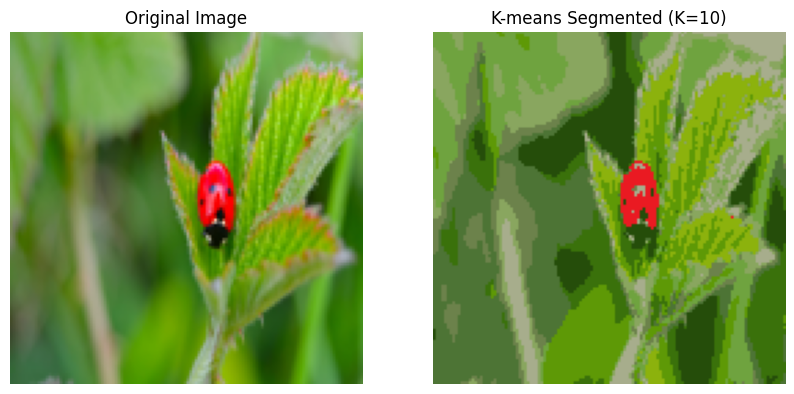

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_data)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.title(f"K-means Segmented (K={K})")
plt.axis('off')
plt.show()
